In [12]:
from pytima import mindif
import urllib.request
from pathlib import Path
import shutil
import os

To demonstrate the usage of pytima we download a small example file from curtin.

In [25]:
# path to open file data scanned by
# John de Laeter Research Centre 
# https://jdlc.curtin.edu.au/
urlpath = 'http://ddfe.curtin.edu.au/gswa-library/22/IECUR00A7/IECUR00A7.mindif.zip'
local_file = Path(urlpath).name
local_folder = local_file.replace('.zip','')
data_folder = Path('./data')
output_file = data_folder.joinpath(local_file)

In [21]:
if not data_folder.exists():
    data_folder.mkdir()

In [26]:
if not output_file.exists:
    # download the data
    with urllib.request.urlopen(urlpath) as response:
        byte_string = response.read()
    # write the byte string
    with open(local_file,'wb') as out:
        out.write(byte_string)
    # unpack the zip file 
    shutil.unpack_archive(output_file)


In [47]:
# read the data
scan = mindif.read(data_folder.joinpath(output_file.stem))

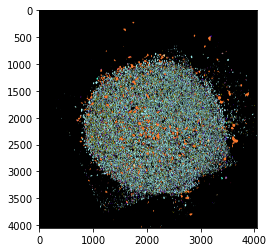

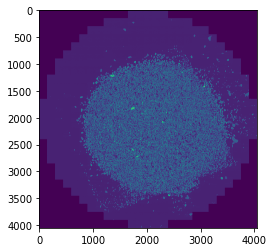

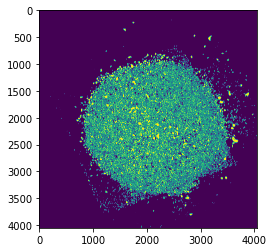

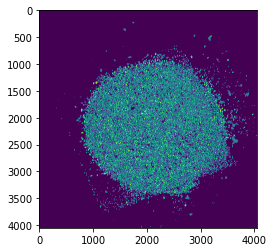

In [52]:
plot_types = ['phases_rgb', 'bse', 'mask','phases']
for i,j in enumerate(plot_types):
    scan.plotScan(j)